<a href="https://colab.research.google.com/github/YigitBCesur/Feature-Engineering/blob/main/Feature_Engineering_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align='center' style='color:blue'>Exercise: Outlier removal using standard deviation and z score<h2>

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe. 

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
from google.colab import files

uploaded = files.upload()

Saving bhp.csv to bhp.csv


In [3]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


We will quickly examine price_per_sqft column to check min,max,mean and percentile values

In [4]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score

Also **plot histogram** to see how is the data distribution

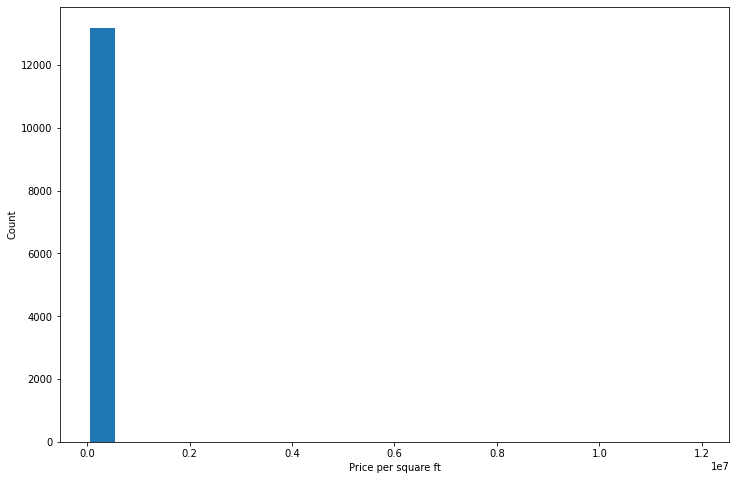

In [5]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using **log scale** can make visualization little better

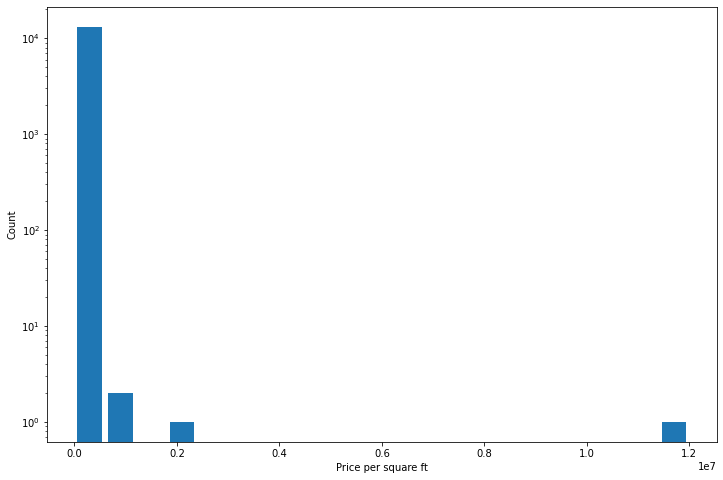

In [6]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

You see atleast few bars on right hand side of our highest building at least :)

<h3 style='color:purple'>(1) Treat outliers using percentile first</h3>

In [7]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [8]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
1005,other,1 BHK,15.0,1.0,30.0,1,200000
12355,other,4 BHK,16335.0,4.0,149.0,4,912
8307,Bannerghatta Road,5 BHK,2500.0,4.0,1400.0,5,56000
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) 
Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [9]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [10]:
df.shape

(13200, 7)

In [11]:
df.shape[0] - df2.shape[0]

28

**We removed total 28 outliers**

<h3 style='color:purple'>(2) Now remove outliers using 4 standard deviation</h3>

In [12]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589432, -9900.429065502582)

In [13]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8861,Cunningham Road,5 Bedroom,2925.0,5.0,936.0,5,32000
9808,Uttarahalli,6 Bedroom,1200.0,6.0,330.0,6,27500
3420,other,3 Bedroom,1350.0,3.0,380.0,3,28148
12636,OMBR Layout,5 Bedroom,600.0,3.0,140.0,5,23333
12051,Malleshwaram,5 Bedroom,3000.0,4.0,900.0,5,30000
5315,Banashankari Stage II,4 Bedroom,1500.0,2.0,650.0,4,43333
1721,other,5 Bedroom,2400.0,5.0,625.0,5,26041
12334,Indira Nagar,4 Bedroom,2400.0,4.0,700.0,4,29166
11661,other,4 Bedroom,1200.0,4.0,375.0,4,31250
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274


In [14]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [15]:
df2.shape[0]-df3.shape[0]

125

In this step we removed total 125 outliers

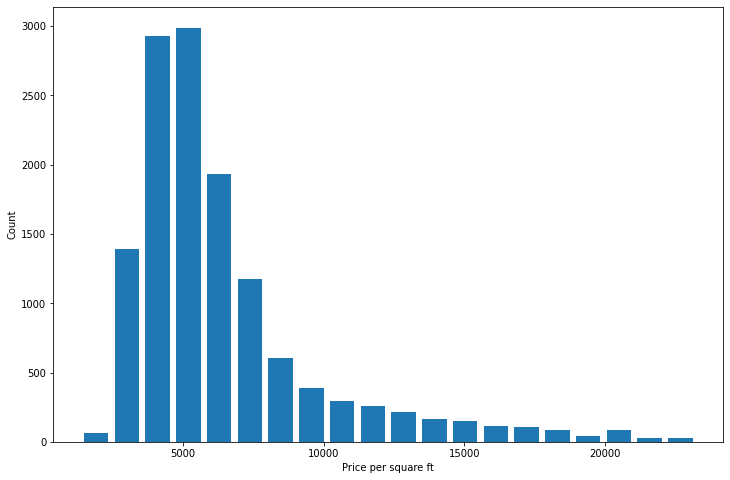

In [16]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

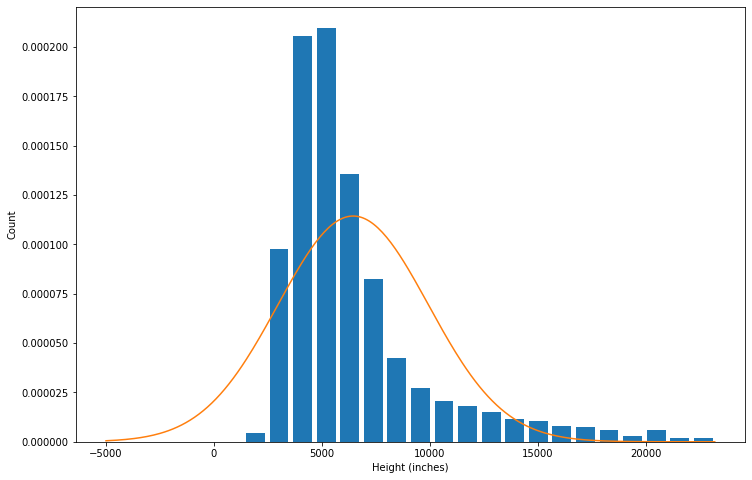

In [17]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

<h3 style='color:purple'>(3) Now remove outliers using z score. Use z score of 4 as your thresold</h3>

In [18]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
6031,Kaikondrahalli,3 BHK,1605.0,3.0,105.00,3,6542,-0.029378
12675,CV Raman Nagar,2 BHK,1227.0,2.0,42.88,2,3494,-0.765428
10356,Sarjapur Road,2 BHK,970.0,2.0,36.00,2,3711,-0.713026
3743,Harlur,3 BHK,1758.0,3.0,133.00,3,7565,0.217663
16,Bisuvanahalli,3 BHK,1180.0,3.0,48.00,3,4067,-0.627056
4438,Ambalipura,2 BHK,896.0,2.0,30.13,2,3362,-0.797304
6799,Electronic City,2 BHK,1130.0,2.0,32.63,2,2887,-0.912010
4314,Hormavu,3 BHK,1453.0,2.0,43.58,3,2999,-0.884964
1668,Yelahanka,2 BHK,1150.0,2.0,46.00,2,4000,-0.643236
3911,Electronic City,3 BHK,1500.0,2.0,100.00,3,6666,0.000567


In [19]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [20]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
1548,Uttarahalli,5 Bedroom,400.00,5.0,200.0,5,50000,10.465136
5315,Banashankari Stage II,4 Bedroom,1500.00,2.0,650.0,4,43333,8.855147
5639,other,3 BHK,2777.29,5.0,650.0,3,23404,4.042565
12900,HAL 2nd Stage,5 Bedroom,2040.00,4.0,500.0,5,24509,4.309408
2618,Malleshwaram,7 Bedroom,3000.00,4.0,900.0,7,30000,5.635409


In [21]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [22]:
df2.shape[0] - df4.shape[0]

125

In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation